In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tmdb-movies.csv to tmdb-movies.csv


In [50]:
import pandas as pd
df = pd.read_csv("/tmdb-movies.csv")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  float64
 1   imdb_id         10855 non-null  object 
 2   popularity      10865 non-null  float64
 3   budget          10865 non-null  float64
 4   revenue         10865 non-null  float64
 5   original_title  10865 non-null  object 
 6   cast            10789 non-null  object 
 7   homepage        2936 non-null   object 
 8   director        10821 non-null  object 
 9   tagline         8041 non-null   object 
 10  keywords        9372 non-null   object 
 11  overview        10861 non-null  object 
 12  runtime         10865 non-null  float64
 13  genres          10842 non-null  object 
 14  genere1         8514 non-null   object 
 15  genere2         5078 non-null   object 
 16  genere3         1980 non-null   object 
 17  release_year    10865 non-null 

In [52]:
print(list(df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'genere1', 'genere2', 'genere3', 'release_year', 'budget_adj', 'revenue_adj']


In [53]:
columns_to_drop = ['id', 'imdb_id','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','budget_adj', 'revenue_adj']
df = df.drop(columns=columns_to_drop)

In [54]:
df.head()

popularity       budget       revenue                original_title  \
0         NaN          NaN           NaN                           NaN   
1   32.985763  150000000.0  1.513529e+09                Jurassic World   
2   28.419936  150000000.0  3.784364e+08            Mad Max: Fury Road   
3   13.112507  110000000.0  2.952382e+08                     Insurgent   
4   11.173104  200000000.0  2.068178e+09  Star Wars: The Force Awakens   

   runtime     genres          genere1          genere2   genere3  \
0      NaN        NaN              NaN              NaN       NaN   
1    124.0     Action        Adventure  Science Fiction  Thriller   
2    120.0     Action        Adventure  Science Fiction  Thriller   
3    119.0  Adventure  Science Fiction         Thriller       NaN   
4    136.0     Action        Adventure  Science Fiction   Fantasy   

   release_year  
0           NaN  
1        2015.0  
2        2015.0  
3        2015.0  
4        2015.0

In [55]:
df = df.drop(index=0)

In [56]:
df = df[(df != 0).all(axis=1)]

In [57]:
df.head()

popularity       budget       revenue                original_title  \
1   32.985763  150000000.0  1.513529e+09                Jurassic World   
2   28.419936  150000000.0  3.784364e+08            Mad Max: Fury Road   
3   13.112507  110000000.0  2.952382e+08                     Insurgent   
4   11.173104  200000000.0  2.068178e+09  Star Wars: The Force Awakens   
5    9.335014  190000000.0  1.506249e+09                     Furious 7   

   runtime     genres          genere1          genere2   genere3  \
1    124.0     Action        Adventure  Science Fiction  Thriller   
2    120.0     Action        Adventure  Science Fiction  Thriller   
3    119.0  Adventure  Science Fiction         Thriller       NaN   
4    136.0     Action        Adventure  Science Fiction   Fantasy   
5    137.0     Action            Crime         Thriller       NaN   

   release_year  
1        2015.0  
2        2015.0  
3        2015.0  
4        2015.0  
5        2015.0

<ipython-input-71-9a2bde67f6d7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_popularity, x='genre', y='popularity', palette='pastel')


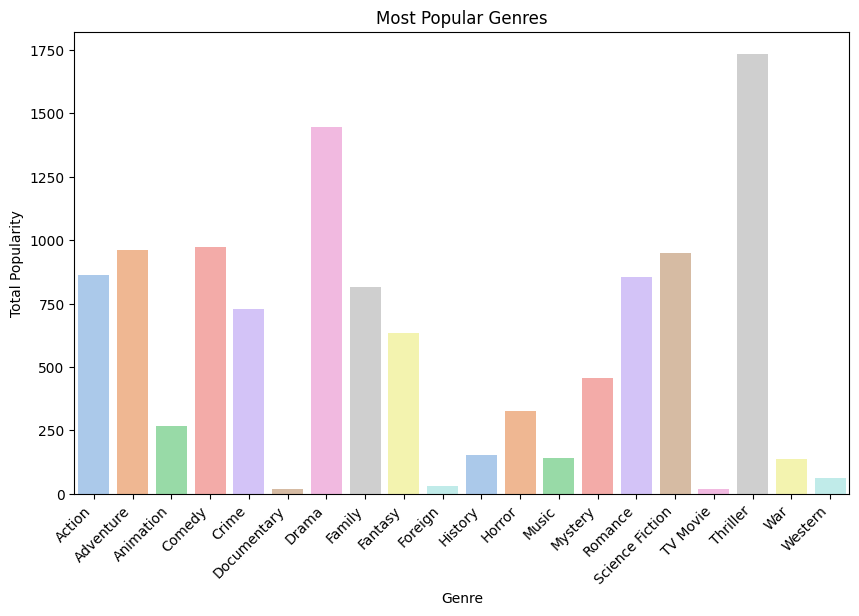

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/tmdb-movies.csv')

genre_long = df.melt(id_vars=['popularity'], value_vars=['genere1', 'genere2', 'genere3'], var_name='genre_type', value_name='genre')
genre_long = genre_long.dropna(subset=['genre'])

# Aggregate popularity by genre
genre_popularity = genre_long.groupby('genre')['popularity'].sum().reset_index()
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_popularity, x='genre', y='popularity', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Total Popularity')
plt.title('Most Popular Genres')
plt.show()


<ipython-input-72-51abe072b503>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_profitability, x='genre', y='revenue', palette='pastel')


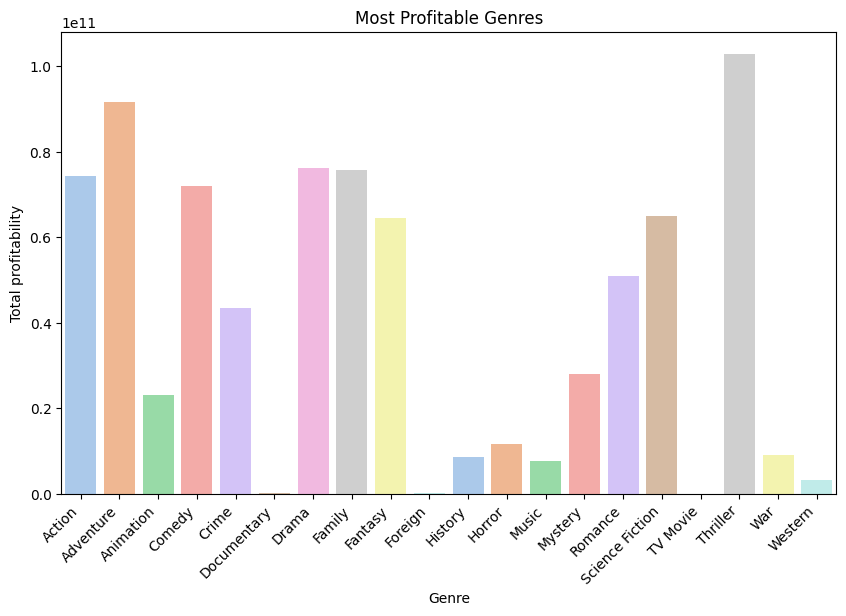

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/tmdb-movies.csv')

genre_long = df.melt(id_vars=['revenue'], value_vars=['genere1', 'genere2', 'genere3'], var_name='genre_type', value_name='genre')
genre_long = genre_long.dropna(subset=['genre'])

# Aggregate popularity by genre
genre_profitability = genre_long.groupby('genre')['revenue'].sum().reset_index()
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_profitability, x='genre', y='revenue', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Total profitability')
plt.title('Most Profitable Genres')
plt.show()


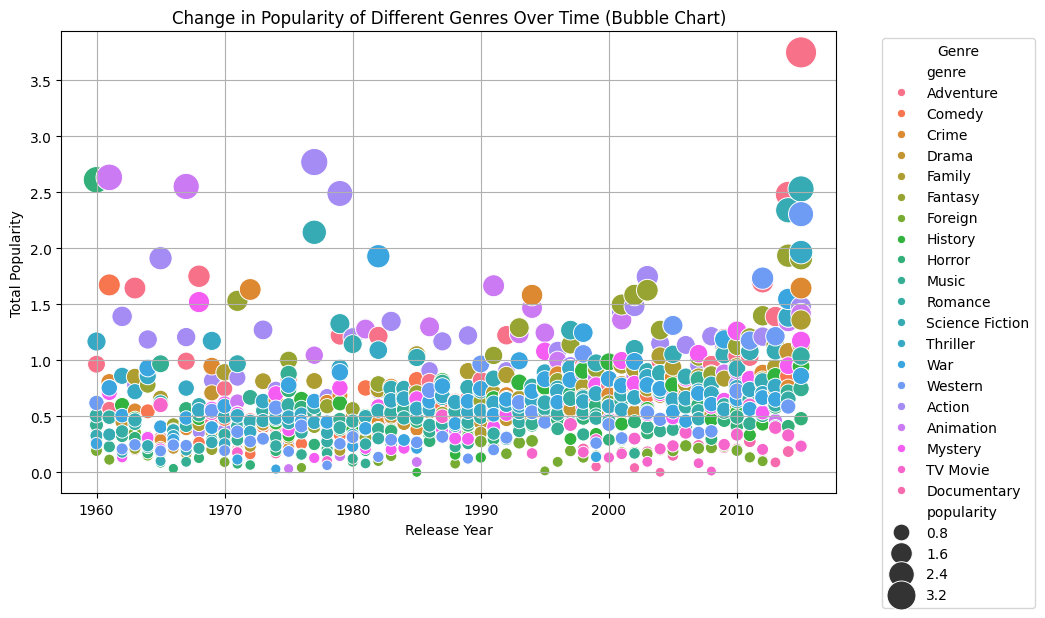

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/tmdb-movies.csv')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
genre_long = df.melt(id_vars=['release_year', 'popularity'],value_vars=['genere1', 'genere2', 'genere3'], var_name='genre_type', value_name='genre')
genre_long = genre_long.dropna(subset=['genre'])
# Aggregate average popularity by genre and release year
genre_popularity_over_time = genre_long.groupby(['release_year', 'genre'])['popularity'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=genre_popularity_over_time, x='release_year', y='popularity', hue='genre', size='popularity', sizes=(50, 500))
plt.xlabel('Release Year')
plt.ylabel('Total Popularity')
plt.title('Change in Popularity of Different Genres Over Time (Bubble Chart)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

NameError: name 'false' is not defined

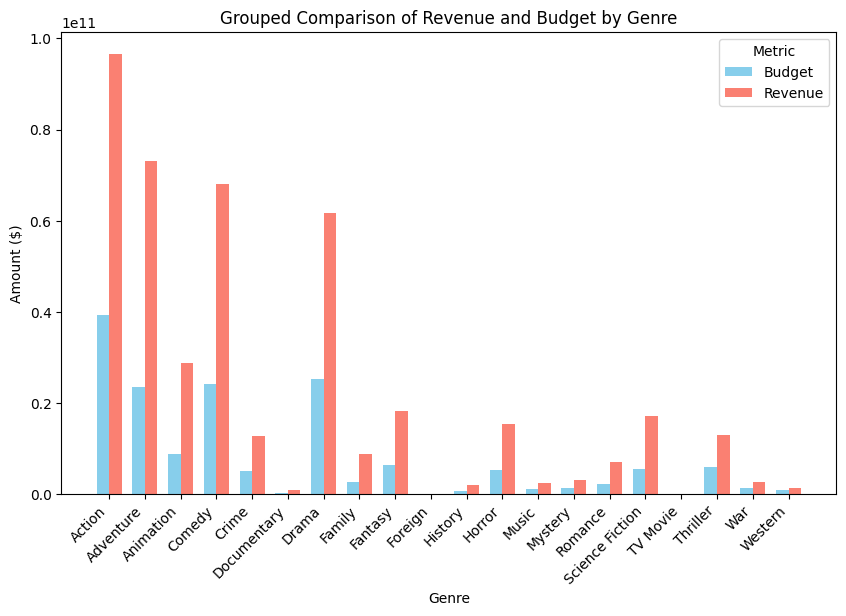

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/tmdb-movies.csv')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
genre_summary = df.groupby('genres').agg({'budget': 'sum', 'revenue': 'sum'}).reset_index()
positions = range(len(genre_summary))
plt.figure(figsize=(10, 6))
bar_width = 0.35
plt.bar([p - bar_width/2 for p in positions], genre_summary['budget'], bar_width, label='Budget', color='skyblue')
plt.bar([p + bar_width/2 for p in positions], genre_summary['revenue'], bar_width, label='Revenue', color='salmon')
plt.xticks(positions, genre_summary['genres'], rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Amount ($)')
plt.title('Grouped Comparison of Revenue and Budget by Genre')
plt.legend(title='Metric')
plt.grid(false)
plt.show()